In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing import image


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install unrar
!unrar x /content/drive/MyDrive/Colab-Notebooks/NUS/SummerProject/dataset/Final_v1.rar

In [ ]:
!unzip /content/drive/MyDrive/Colab-Notebooks/NUS/SummerProject/dataset/data.zip

In [ ]:
img_width, img_height = 200, 200

In [ ]:
train_data_dir='/content/Final_v1/Train'
test_data_dir = '/content/Final_v1/Test'
batch_size=600
epochs=42

In [ ]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 59884 images belonging to 3 classes.
Found 14070 images belonging to 3 classes.


In [ ]:
train_samples = train_generator.samples
print(train_samples)
test_samples=test_generator.samples
print(test_samples)

59884
14070


In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.6),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.6),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.6),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(42, activation='relu'),
    layers.Dense(42, activation='softmax'),
    layers.Dense(3,activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam

# Increase learning rate to 0.02
opt = Adam(learning_rate=0.02)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
import os
from PIL import Image

def verify_images(directory):
    for foldername in os.listdir(directory):
        folder_path = os.path.join(directory, foldername)
        for filename in os.listdir(folder_path):
            if filename.endswith(('jpeg', 'png', 'jpg', 'bmp', 'gif')):
                try:
                    img_path = os.path.join(folder_path, filename)
                    img = Image.open(img_path)
                    img.verify()
                except (IOError, SyntaxError) as e:
                    print('Bad file:', img_path)

verify_images('/content/Final_v1/Train')
verify_images('/content/Final_v1/Test')


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=9,
    validation_data=test_generator,
    validation_steps=test_samples // batch_size)

Epoch 1/9
99/99 [==============================] - 1058s 10s/step - loss: 0.4484 - accuracy: 0.8213 - val_loss: 1.6250 - val_accuracy: 0.5911
Epoch 2/9
99/99 [==============================] - 1031s 10s/step - loss: 0.2495 - accuracy: 0.9095 - val_loss: 0.9284 - val_accuracy: 0.7060
Epoch 3/9
99/99 [==============================] - 1030s 10s/step - loss: 0.2155 - accuracy: 0.9234 - val_loss: 0.8889 - val_accuracy: 0.7648
Epoch 4/9
99/99 [==============================] - 1032s 10s/step - loss: 0.1951 - accuracy: 0.9329 - val_loss: 0.5134 - val_accuracy: 0.8485
Epoch 5/9
99/99 [==============================] - 1030s 10s/step - loss: 0.1769 - accuracy: 0.9399 - val_loss: 1.5554 - val_accuracy: 0.5380
Epoch 6/9
99/99 [==============================] - 1025s 10s/step - loss: 0.1659 - accuracy: 0.9424 - val_loss: 0.6926 - val_accuracy: 0.8083
Epoch 7/9
99/99 [==============================] - 1030s 10s/step - loss: 0.1557 - accuracy: 0.9472 - val_loss: 0.7731 - val_accuracy: 0.7642
Epoch 

In [ ]:
model.save_weights('final_cnn.h5')

In [ ]:
import torch
# Save the PyTorch model as a .pth file
torch.save(model.load_state_dict(strict=False), 'model_final1.pth')

In [ ]:
model.save('/content/final_cnn.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='categorical')

# # Load the trained model
# base_model.load_weights('imagenet')

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_samples // batch_size )

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Found 14070 images belonging to 3 classes.
23/23 [==============================] - 13s 558ms/step - loss: 0.8999 - accuracy: 0.7779
Test Loss: 0.8999016880989075
Test Accuracy: 0.77785325050354


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


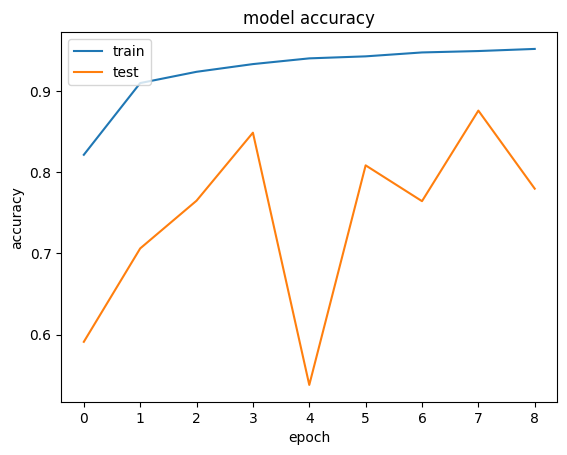

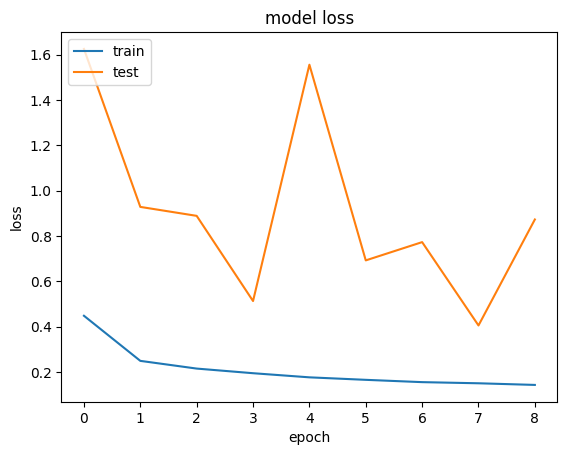

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

  # Load the trained model
  #model.load_weights('first_try.h5')

  # Define a list of image paths
  image_paths = ['/content/FIRE-SMOKE-DATASET/Test/Fire/image_26.jpg',
                '/content/FIRE-SMOKE-DATASET/Test/Smoke/image_12.jpg',
                '/content/FIRE-SMOKE-DATASET/Test/Neutral/image_7.jpg']

  # Iterate over the image paths
  for img_path in image_paths:
      # Load and preprocess the image
      img = image.load_img(img_path, target_size=(img_width, img_height))
      img_array = image.img_to_array(img)
      img_array = np.expand_dims(img_array, axis=0)
      preprocessed_img = img_array / 255.0  # Normalize the image

      # Perform prediction
      prediction = model.predict(preprocessed_img)
      print('Image:', img_path)
      print('Prediction:', prediction[0][0])

      # Plot the image
      import matplotlib.pyplot as plt
      plt.imshow(img)
      plt.show()